# 데이터 읽어오기

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="ticks", color_codes=True)
df = pd.read_csv(r'train.csv')

In [2]:
df

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,...,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,...,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,...,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,...,0.1310,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.01700,-0.1110,-0.9980,-0.9910,-0.998,-0.998,-0.9890,...,0.6670,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,10277,WALKING_UPSTAIRS,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760
3605,10278,WALKING_UPSTAIRS,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800
3606,10279,WALKING_UPSTAIRS,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830
3607,10280,WALKING_UPSTAIRS,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.9270,-0.0843,-0.657,0.267,0.1880


## 결측값 확인

In [23]:
############################ 결측값 확인 ############################
df.isnull().sum()

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 15.5+ MB


## target data의 unique값 확인

In [4]:
# target data unique 값 확인

df['activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

## 인코딩 작업

In [7]:
############################ 인코딩 함수 만들기 ############################

def label_encode(df):
    df_labelled_encode = df.copy()
    # 다른 클래스에 대해 다른 숫자를 지정하는 딕셔너리
    label_encode = {"activity": {"LAYING":0, "SITTING":1, "STANDING":2, "WALKING":3,"WALKING_DOWNSTAIRS":4,"WALKING_UPSTAIRS":5}}
    # .replace를 사용하여 서로 다른 클래스를 숫자로 변경
    df_labelled_encode.replace(label_encode,inplace=True)
    return df_labelled_encode

In [8]:
############################ 인코딩 작업(1) ############################

df_labelled_encode = label_encode(df)

In [9]:
############################ 인코딩 결과(1) ############################

df_labelled_encode

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,2,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,...,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,11,2,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,...,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,14,2,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,...,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,15,2,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,...,0.1310,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364
4,20,2,0.276,-0.01700,-0.1110,-0.9980,-0.9910,-0.998,-0.998,-0.9890,...,0.6670,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,10277,5,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760
3605,10278,5,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800
3606,10279,5,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830
3607,10280,5,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.9270,-0.0843,-0.657,0.267,0.1880


In [10]:
############################ target 값 뽑아내기 ############################

df_labelled_encode_target = df_labelled_encode['activity']
df_labelled_encode_target

0       2
1       2
2       2
3       2
4       2
       ..
3604    5
3605    5
3606    5
3607    5
3608    4
Name: activity, Length: 3609, dtype: int64

In [8]:
############################ 원-핫 인코딩 작업(1) ############################
# y = pd.get_dummies(y)

In [9]:
############################ 원-핫 인코딩 결과(1) ############################
# y

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
3604,0,0,0,0,0,1
3605,0,0,0,0,0,1
3606,0,0,0,0,0,1
3607,0,0,0,0,0,1


In [16]:
df_copy = df_labelled_encode.copy()

## featrues 데이터를 만들기 위해서 target 데이터, 불필요한 데이터 삭제 

In [17]:
df_copy.drop(labels='activity',axis=1, inplace=True)

In [18]:
df_copy.drop(labels='rn',axis=1, inplace=True)

In [19]:
X = df_copy

In [22]:
X

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,-0.983,-0.9410,...,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,-0.985,-0.9400,...,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,-0.992,-0.9430,...,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,-0.888,-0.9260,...,0.1310,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364
4,0.276,-0.01700,-0.1110,-0.9980,-0.9910,-0.998,-0.998,-0.9890,-0.997,-0.9460,...,0.6670,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,-0.217,0.0262,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760
3605,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,-0.245,-0.1170,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800
3606,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,-0.301,-0.1170,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830
3607,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,-0.326,-0.1760,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.9270,-0.0843,-0.657,0.267,0.1880


# 정규화 작업

In [151]:
############################ 정규화 작업 ############################

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [152]:
############################ 결측값 확인 ############################
X.isnull().sum()

tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
tBodyAcc.std.X                         0
tBodyAcc.std.Y                         0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 561, dtype: int64

# train_test_split() 사용하여 train / test data 나누기

In [154]:
############################ train / test data 나누기 ############################

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_labelled_encode_target, 
                                                    test_size=0.2, 
                                                    random_state=150, # 내부적으로 사용되는 난수 값
                                                    shuffle=True, #  데이터를 분리할 때 랜덤으로 분리할지의 유무
                                                    stratify=y) 
# stratify (array) : 분리하기 이전의 클래스 비율을 분리하고 나서도 유지하기 위해 설정해야 하는 값 (종속변수의 컬럼을 넣어주면 됩니다.)
# 원본 데이터의 클래스 비율이 8:2라면 분리된 train data, valid(test) data의 클래스 비율도 8:2가 유지됩니다.
# 따라서 stratify 파라미터는 분류 문제에서만 사용 가능합니다.

# 모델 사용하기

In [155]:
######################### KNN 분류 모델 사용 ############################

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)

In [156]:
############################ 모델 학습하기 ############################

classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# score 확인하기

In [157]:
############################ predict 확인하기 ############################

y_predict = classifier.predict(X_test)

In [158]:
###################### metrics 사용해서 score 확인하기(1) #######################

from sklearn import metrics

metrics.accuracy_score(y_test, y_predict)

0.9404432132963989

In [159]:
############################ score 확인하기(2) ############################

print(classifier.score(X_test, y_test))

0.9404432132963989


## k값에 따른 정확도 확인

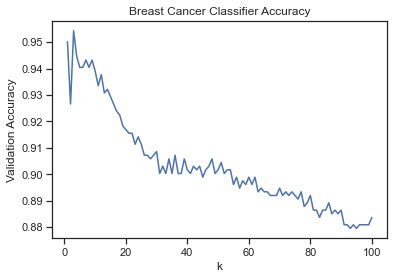

In [98]:
############################ k값에 대한 정확도 확인 ############################

import matplotlib.pyplot as plt
k_list = range(1,101)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test, y_test))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

# test.csv 파일 불러오기

In [209]:
df_test = pd.read_csv(r'test.csv')

## 불필요한 데이터 제거

In [210]:
df_test.drop(labels='rn',axis=1, inplace=True)

In [211]:
df_test

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,0.280,-0.01950,-0.1130,-0.9950,-0.9670,-0.979,-0.997,-0.9640,-0.977,-0.9390,...,0.4150,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491
1,0.277,-0.01660,-0.1150,-0.9980,-0.9810,-0.990,-0.998,-0.9800,-0.990,-0.9420,...,0.0878,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439
2,0.277,-0.02180,-0.1210,-0.9970,-0.9610,-0.984,-0.998,-0.9570,-0.984,-0.9410,...,0.3140,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374
3,0.279,-0.01480,-0.1170,-0.9970,-0.9820,-0.983,-0.997,-0.9820,-0.981,-0.9420,...,0.5610,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270
4,0.279,-0.01450,-0.1070,-0.9980,-0.9860,-0.993,-0.998,-0.9850,-0.995,-0.9430,...,0.6770,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,0.289,-0.02810,-0.0943,-0.0623,0.1140,-0.190,-0.114,0.0393,-0.207,0.3300,...,0.2860,-0.237,-0.607,-0.19600,0.6980,0.990,-0.108,-0.806,0.190,0.1200
1537,0.377,-0.01810,-0.1100,-0.3140,-0.1520,-0.214,-0.394,-0.1810,-0.266,-0.0726,...,-0.1910,-0.323,-0.753,-0.82900,0.0483,0.913,-0.904,-0.695,0.246,0.1730
1538,0.253,-0.02490,-0.1700,-0.3080,-0.1890,-0.141,-0.377,-0.2260,-0.221,0.0920,...,-0.1780,-0.142,-0.564,0.00451,0.3570,-0.946,0.614,-0.695,0.259,0.1580
1539,0.277,0.00108,-0.0740,-0.0685,-0.2450,-0.145,-0.149,-0.3030,-0.199,0.4030,...,-0.1040,0.161,-0.126,0.13400,0.8830,-0.994,0.475,-0.804,0.197,0.1140


# 정규화

In [202]:
############################ 정규화 작업(test.csv) ############################

from sklearn import preprocessing

min_max_scaler_test = preprocessing.MinMaxScaler()
X_scaled_test = min_max_scaler_test.fit_transform(df_test)

In [164]:
df_test.shape

(1541, 561)

In [212]:
############################ 정규화된 결과(test.csv) ############################

X_scaled_test

array([[0.70841889, 0.59026128, 0.2195122 , ..., 0.0775275 , 0.61864407,
        0.46987768],
       [0.70533881, 0.59714964, 0.21763602, ..., 0.07805134, 0.62076271,
        0.47252803],
       [0.70533881, 0.5847981 , 0.2120075 , ..., 0.07805134, 0.62288136,
        0.47584098],
       ...,
       [0.68069815, 0.57743468, 0.16604128, ..., 0.15819801, 0.65995763,
        0.57543323],
       [0.70533881, 0.63914489, 0.25609756, ..., 0.10110005, 0.62711864,
        0.55300714],
       [0.61806982, 0.5567696 , 0.2260788 , ..., 0.18334206, 0.67213983,
        0.58715596]])

# 예측하기(test.csv)

In [213]:
############################ 예측 하기(원-핫 인코딩) ############################
########### 예측 하기(인코딩) ############

model = classifier.predict(X_scaled_test)

In [204]:
model.shape

(1541,)

In [214]:
################# 예측 결과 ####################
model

array([2, 2, 2, ..., 5, 4, 5], dtype=int64)

In [215]:
################# 예측한 값이 6가지가 제대로 나왔는지 확인하기 위한 작업 #################
b = set(model)
b

{0, 1, 2, 3, 4, 5}

In [62]:
#################### 원-핫 인코딩을 일반 인코딩으로 표현 ####################
#################### 사용 X ####################

# workOut_types = []
# for ii in range(0,model.shape[0]):
#     workOut_types.append(np.argmax(model[ii,:]))
# print(workOut_types)

[2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# 디코딩

In [216]:
############################ 디코딩 함수 만들기 ############################

def label_decode(df):
    df_labelled = df.copy()
    # 다른 클래스에 대해 다른 숫자를 지정하는 딕셔너리
    label_decode = {"activity": {0:"LAYING", 1:"SITTING", 2:"STANDING", 3:"WALKING",4:"WALKING_DOWNSTAIRS",5:"WALKING_UPSTAIRS"}}
    # .replace를 사용하여 서로 다른 클래스를 숫자로 변경
    df_labelled.replace(label_decode,inplace=True)
    return df_labelled

In [217]:
############################ 리스트 - > 데이터프레임 변환 ############################

df_labeled = pd.DataFrame(model, columns = ['activity'])

# 예측한 결과

In [218]:
############################ 결과 ############################

df_labeled = label_decode(df_labeled)

In [219]:
df_labeled

,activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING
...,...
1536,WALKING_DOWNSTAIRS
1537,WALKING_UPSTAIRS
1538,WALKING_UPSTAIRS
1539,WALKING_DOWNSTAIRS


# test.csv에 예측값 추가하기

In [220]:
# DataFrame.insert(loc, column, value, allow_duplicates=False)

# loc = 추가하고 싶은 위치의 index 값
# column = 추가하고 싶은 column의 이름을 넣는다.
# value = 추가하고자 하는 column의 값을 넣는다.

df_test_copy = df_test.copy()
df_test_copy

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,0.280,-0.01950,-0.1130,-0.9950,-0.9670,-0.979,-0.997,-0.9640,-0.977,-0.9390,...,0.4150,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491
1,0.277,-0.01660,-0.1150,-0.9980,-0.9810,-0.990,-0.998,-0.9800,-0.990,-0.9420,...,0.0878,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439
2,0.277,-0.02180,-0.1210,-0.9970,-0.9610,-0.984,-0.998,-0.9570,-0.984,-0.9410,...,0.3140,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374
3,0.279,-0.01480,-0.1170,-0.9970,-0.9820,-0.983,-0.997,-0.9820,-0.981,-0.9420,...,0.5610,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270
4,0.279,-0.01450,-0.1070,-0.9980,-0.9860,-0.993,-0.998,-0.9850,-0.995,-0.9430,...,0.6770,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,0.289,-0.02810,-0.0943,-0.0623,0.1140,-0.190,-0.114,0.0393,-0.207,0.3300,...,0.2860,-0.237,-0.607,-0.19600,0.6980,0.990,-0.108,-0.806,0.190,0.1200
1537,0.377,-0.01810,-0.1100,-0.3140,-0.1520,-0.214,-0.394,-0.1810,-0.266,-0.0726,...,-0.1910,-0.323,-0.753,-0.82900,0.0483,0.913,-0.904,-0.695,0.246,0.1730
1538,0.253,-0.02490,-0.1700,-0.3080,-0.1890,-0.141,-0.377,-0.2260,-0.221,0.0920,...,-0.1780,-0.142,-0.564,0.00451,0.3570,-0.946,0.614,-0.695,0.259,0.1580
1539,0.277,0.00108,-0.0740,-0.0685,-0.2450,-0.145,-0.149,-0.3030,-0.199,0.4030,...,-0.1040,0.161,-0.126,0.13400,0.8830,-0.994,0.475,-0.804,0.197,0.1140


In [221]:
############################ 칼럼 추가(test.csv) ############################

df_test_copy.insert(0,'activity',df_labeled['activity'], allow_duplicates=False)

# 최종결과

In [222]:
############################ 최종 결과(test.csv) ############################
df_test_copy

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,STANDING,0.280,-0.01950,-0.1130,-0.9950,-0.9670,-0.979,-0.997,-0.9640,-0.977,...,0.4150,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491
1,STANDING,0.277,-0.01660,-0.1150,-0.9980,-0.9810,-0.990,-0.998,-0.9800,-0.990,...,0.0878,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439
2,STANDING,0.277,-0.02180,-0.1210,-0.9970,-0.9610,-0.984,-0.998,-0.9570,-0.984,...,0.3140,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374
3,STANDING,0.279,-0.01480,-0.1170,-0.9970,-0.9820,-0.983,-0.997,-0.9820,-0.981,...,0.5610,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270
4,STANDING,0.279,-0.01450,-0.1070,-0.9980,-0.9860,-0.993,-0.998,-0.9850,-0.995,...,0.6770,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,WALKING_DOWNSTAIRS,0.289,-0.02810,-0.0943,-0.0623,0.1140,-0.190,-0.114,0.0393,-0.207,...,0.2860,-0.237,-0.607,-0.19600,0.6980,0.990,-0.108,-0.806,0.190,0.1200
1537,WALKING_UPSTAIRS,0.377,-0.01810,-0.1100,-0.3140,-0.1520,-0.214,-0.394,-0.1810,-0.266,...,-0.1910,-0.323,-0.753,-0.82900,0.0483,0.913,-0.904,-0.695,0.246,0.1730
1538,WALKING_UPSTAIRS,0.253,-0.02490,-0.1700,-0.3080,-0.1890,-0.141,-0.377,-0.2260,-0.221,...,-0.1780,-0.142,-0.564,0.00451,0.3570,-0.946,0.614,-0.695,0.259,0.1580
1539,WALKING_DOWNSTAIRS,0.277,0.00108,-0.0740,-0.0685,-0.2450,-0.145,-0.149,-0.3030,-0.199,...,-0.1040,0.161,-0.126,0.13400,0.8830,-0.994,0.475,-0.804,0.197,0.1140
